In [1]:
!pip install tensorflow

  Using cached tensorflow-2.16.1-cp39-cp39-win_amd64.whl (2.1 kB)
  Using cached tensorflow_intel-2.16.1-cp39-cp39-win_amd64.whl (376.9 MB)


In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam

D:\anaconda\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


##### Loading Data

In [3]:
def load_data(data_dir, img_size=(64, 64)):
    labels = []
    images = []
    classes = sorted(os.listdir(data_dir))
    for label in classes:
        label_dir = os.path.join(data_dir, label)
        for img_file in os.listdir(label_dir):
            img_path = os.path.join(label_dir, img_file)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
                img = cv2.resize(img, img_size)  # Resize image
                images.append(img)
                labels.append(classes.index(label))
    return np.array(images), np.array(labels), classes


In [4]:
data_dir="D:\\MIT Fy MSc\\prodigy_internship(ML)\\dataset\\hand"
img_size = (64, 64)  
images, labels, classes = load_data(data_dir, img_size)

In [5]:
# Normalize images
images = images / 255.0

# Reshape images to add channel dimension
images = images.reshape(-1, img_size[0], img_size[1], 1)

# Convert labels to categorical format
labels = to_categorical(labels, num_classes=len(classes))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")
print(f"Number of classes: {len(classes)}")

Training data shape: (4814, 64, 64, 1)
Testing data shape: (1204, 64, 64, 1)
Number of classes: 3


##### Model Development

In [7]:
# Build CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(classes), activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


D:\anaconda\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,624,963 (6.20 MB)

 Trainable params: 1,624,963 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

##### Model Training

In [8]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Save the model
model.save("hand_gesture_recognition_model.h5")

Epoch 1/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 9s 61ms/step - accuracy: 0.6017 - loss: 0.8402 - val_accuracy: 0.9668 - val_loss: 0.1348
Epoch 2/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step - accuracy: 0.9418 - loss: 0.1592 - val_accuracy: 0.9938 - val_loss: 0.0288
Epoch 3/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - accuracy: 0.9733 - loss: 0.0748 - val_accuracy: 0.9927 - val_loss: 0.0292
Epoch 4/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step - accuracy: 0.9886 - loss: 0.0378 - val_accuracy: 0.9948 - val_loss: 0.0126
Epoch 5/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 7s 61ms/step - accuracy: 0.9879 - loss: 0.0295 - val_accuracy: 0.9979 - val_loss: 0.0076
Epoch 6/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - accuracy: 0.9920 - loss: 0.0298 - val_accuracy: 0.9990 - val_loss: 0.0072
Epoch 7/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - accuracy: 0.9953 - loss: 0.0176 - val_accuracy: 0.9969 - val_loss: 0.0073
Epoch 8/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - accuracy: 0.9967 - loss: 0.0140 - val_accu

##### Model Evaluation

In [9]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 1.0000 - loss: 4.5289e-04
Test Loss: 0.0009
Test Accuracy: 1.0000


##### Prediction and Visualisation

38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


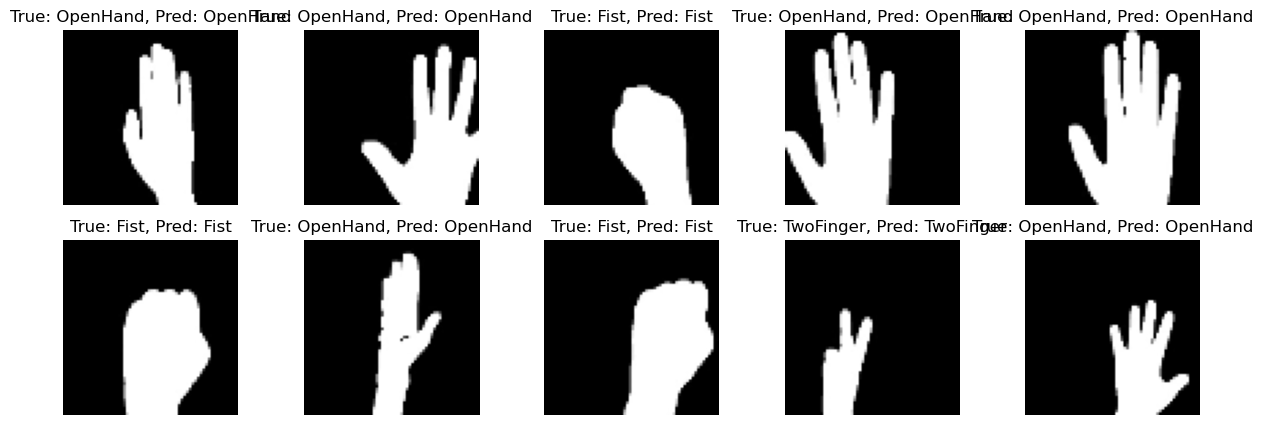

In [10]:
# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Plot some examples with predictions
def plot_examples(X, y_true, y_pred, classes, img_size=(64, 64), num_examples=10):
    plt.figure(figsize=(15, 5))
    for i in range(num_examples):
        idx = np.random.randint(0, len(X))
        img = X[idx].reshape(img_size)
        plt.subplot(2, num_examples // 2, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f"True: {classes[y_true[idx]]}, Pred: {classes[y_pred[idx]]}")
        plt.axis('off')
    plt.show()

plot_examples(X_test, y_true_classes, y_pred_classes, classes)